# county-level segregation

## diagnostics for small subunit counties
Examine level and trend for diversity among small subunit (block group) counties

In [25]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# read diversity scores from db
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.*, B.block_groups 
FROM county_diversity AS A JOIN county_block_group_count AS B
ON A.GISJOIN = B.GISJOIN
;
'''
df = pd.read_sql(qry, con, index_col="GISJOIN")
con.close()
df.head()

,pwhite_10,pblack_10,pasian_10,phisp_10,pother_10,theil_10,theil2_10,total_10,total2_10,pwhite_00,...,pwhite_90,pblack_90,pasian_90,phisp_90,pother_90,theil_90,theil2_90,total_90,total2_90,block_groups
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G1700030,0.604880,0.352998,0.002671,0.018815,0.003642,0.782691,0.669564,8238,8046,0.622315,...,0.661114,0.327499,0.004517,0.005082,0.001788,0.701713,0.569212,10626.00,10559.00,9
G4701190,0.801905,0.124463,0.006213,0.048285,0.003632,0.634690,0.469896,80956,78904,0.810484,...,0.833066,0.156845,0.002791,0.005893,0.001405,0.498606,0.328910,54811.98,54581.98,50
G4201150,0.971423,0.003460,0.002998,0.013009,0.001615,0.132054,0.090078,43356,42831,0.980845,...,0.989622,0.001957,0.002155,0.004012,0.002254,0.071636,0.034177,40376.02,40198.02,40
G3700530,0.886567,0.057247,0.006413,0.029898,0.005054,0.434533,0.277690,23547,22928,0.895382,...,0.871069,0.112260,0.003713,0.008008,0.004950,0.451456,0.266211,13736.00,13617.00,11
G2000870,0.950016,0.005228,0.002301,0.017725,0.009464,0.205740,0.119587,19126,18609,0.959676,...,0.975165,0.004590,0.003898,0.008299,0.008048,0.149436,0.066066,15904.87,15714.87,15


In [6]:
# get descriptives for count of block groups
df['block_groups'].describe()

count    3143.000000
mean       68.985682
std       211.315401
min         1.000000
25%        10.000000
50%        21.000000
75%        49.000000
max      6417.000000
Name: block_groups, dtype: float64

In [16]:
# get descriptives for diversity
df['theil_10'].describe()

count    3143.000000
mean        0.518567
std         0.295811
min         0.021240
25%         0.244037
50%         0.488947
75%         0.767286
max         1.441097
Name: theil_10, dtype: float64

In [52]:
# how many counties w/ fewer than 10 block groups
print df.loc[df['block_groups']<10].groupby('block_groups').size()

block_groups
1     45
2     74
3     72
4     86
5     78
6     95
7     93
8     95
9    102
dtype: int64


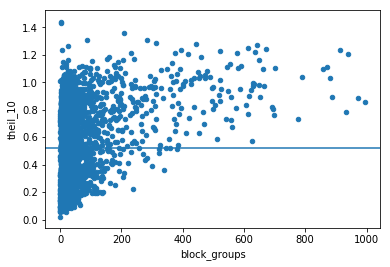

In [23]:
# how does diversity vary across numbers of block groups?
# plot against average diversity
ax=df.loc[df['block_groups']<1000].plot.scatter('block_groups', 'theil_10')
ax.axhline(y=df['theil_10'].mean())

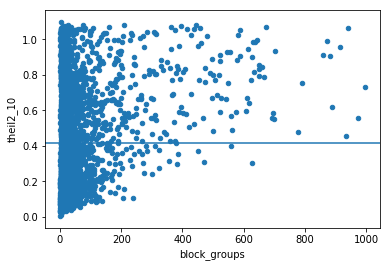

In [24]:
# reproduce plot using diversity score based only on NH White, NH Black, and Hispanic pop
ax=df.loc[df['block_groups']<1000].plot.scatter('block_groups', 'theil2_10')
ax.axhline(y=df['theil2_10'].mean())

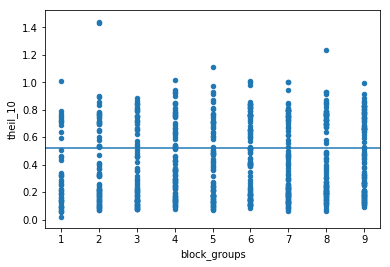

In [53]:
# focus on very small subunit counties and plot hline at average diversity for all counties
ax=df.loc[df['block_groups']<10].plot.scatter('block_groups', 'theil_10')
ax.axhline(y=df['theil_10'].mean())

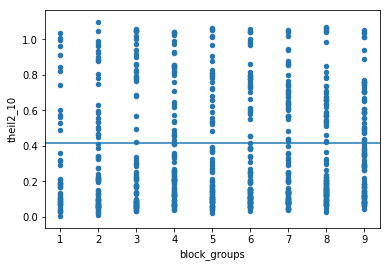

In [54]:
# repeat above figure using diversity score excluding asian and "other"
ax=df.loc[df['block_groups']<10].plot.scatter('block_groups', 'theil2_10')
ax.axhline(y=df['theil2_10'].mean())

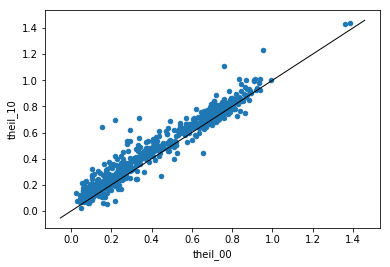

In [28]:
# plot change in diversity for very small subunit counties
ax=df.loc[df['block_groups']<10].plot.scatter('theil_00', 'theil_10')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='black', linewidth=1)

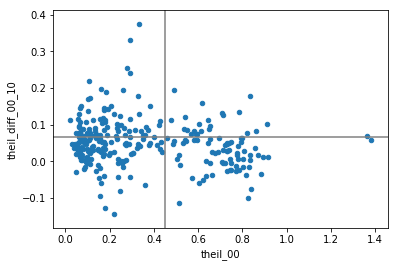

In [50]:
# plot difference between 2010 and 2000 diversity score for small subunit counties
# against mean value for all counties
# 5 group diversity score
df['theil_diff_00_10'] = df['theil_10'] - df['theil_00']
ax=df.loc[df['block_groups']<5].plot.scatter('theil_00', 'theil_diff_00_10')
ax.axhline(y=df['theil_diff_00_10'].mean(), color='gray')
ax.axvline(x=df['theil_00'].mean(), color='gray')

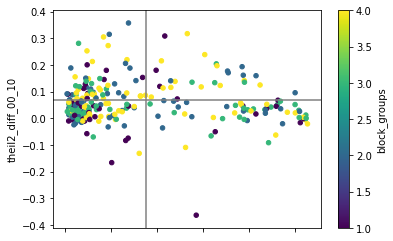

In [65]:
# plot difference between 2010 and 2000 diversity score for small subunit counties
# against mean value for all counties
# 3 group diversity score
df['theil2_diff_00_10'] = df['theil2_10'] - df['theil2_00']
ax=df.loc[df['block_groups']<5].plot.scatter('theil2_00', 'theil2_diff_00_10', c='block_groups', cmap='viridis')
ax.axhline(y=df['theil2_diff_00_10'].mean(), color='gray')
ax.axvline(x=df['theil2_00'].mean(), color='gray')

In [59]:
df.loc[df['block_groups']<10]['total_10'].describe()

count      277.000000
mean      2805.812274
std       1590.440070
min         82.000000
25%       1734.000000
50%       2538.000000
75%       3755.000000
max      10247.000000
Name: total_10, dtype: float64

if the question is how has diversity changed over time for small subunit counties, the answer is not much, though most counties seem to have increased in diversity between 90 and 2000, which fits intuition. is the question then whether small subunit counties saw smaller changes/increases in diversity, or even losses, than counties as a whole? has racial and ethnic composition changed that greatly in most places? what is the benchmark for greatly?

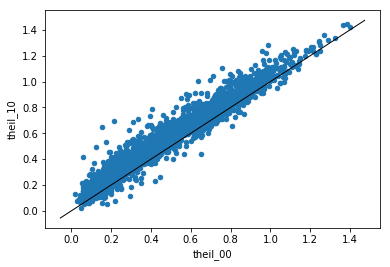

In [30]:
# plot change in diversity for ALL counties
ax=df.plot.scatter('theil_00', 'theil_10')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='black', linewidth=1)

Need to follow-up w/ RF on how to how to proceed given these results. RF suggested uniformly low diversity would reduce the necessity of considering small subunit counties for calculating segregation. I guess the logic would be there are fewer people to segregate in places w/ very low diversity.

For now, look into small subunit counties with high diversity. Who are they?

In [29]:
merged['theil10'].mean()

0.5185670430073522

In [36]:
merged['theil210'].mean()

0.4187898770632792

In [48]:
# read diversity scores from db
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.GISJOIN, D.STATE, B.namelsad10, A.theil10, D.CL8AA2010
FROM county_diversity AS A JOIN us_county_2010 AS B 
ON A.GISJOIN = B.GISJOIN
JOIN county_block_group_count AS C ON A.GISJOIN = C.GISJOIN
JOIN nhgis_pop_race_norm_90_10 AS D ON A.GISJOIN = D.GISJOIN
WHERE C.block_groups <= 5
AND A.theil10 > 0.52
;
'''
df = pd.read_sql(qry, con, index_col="GISJOIN")
con.close()

df.groupby('STATE').size()

STATE
Alaska             8
Arkansas           1
California         1
Colorado           4
Georgia           10
Hawaii             1
Idaho              3
Kansas             9
Minnesota          1
Mississippi        1
Nebraska           1
Nevada             5
New Mexico         7
North Carolina     3
Oklahoma           3
South Dakota       9
Texas             50
Virginia           2
Wisconsin          1
dtype: int64

In [47]:
len(df)

120

In [49]:
df['CL8AA2010'].describe()

count      120.000000
mean      3669.808333
std       1963.839710
min         82.000000
25%       2234.750000
50%       3500.000000
75%       4884.250000
max      10170.000000
Name: CL8AA2010, dtype: float64